In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import collections
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [7]:
%cd content/drive
!ls

#input_filename = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

[Errno 2] No such file or directory: 'content/drive'
/content
drive  sample_data


'1.15.0'

In [4]:

import tensorflow as tf
tf.__version__

TensorFlow is already loaded. Please restart the runtime to change versions.


'1.15.0'

In [11]:
%cd My Drive/content/drive
!ls


/content/drive/My Drive/content/drive
my_model.h5  pulsar_stars.csv  WA_Fn-UseC_-Telco-Customer-Churn.csv


#### Loading the data

In [0]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',sep=',')

#### Viewing the data

In [13]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Checking the datatype of all the features

In [14]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Changing the datatype of the column from string to float

In [0]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"],errors="coerce")

#### To check the number of null values in the dataset

In [16]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Summary of the data

In [17]:
summary = data.describe(include=["O"])
summary

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3217-FZDMN,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


#### From the summary table,it is clear that the following features are categorical:

In [0]:
data.dropna(how="any",inplace=True)

####  Rechecking for any null values in the dataset

In [19]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Splitting Continuous And Categorical Variables

In [0]:
data_cont = ['tenure','MonthlyCharges', 'TotalCharges']
data_cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies',
            'Contract', 'PaperlessBilling','PaymentMethod']

#### Plotting Distribution Of The Data

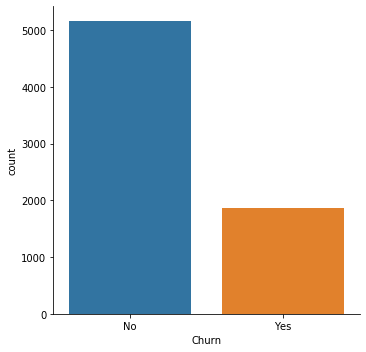

In [21]:
sns.catplot(x="Churn", kind="count", data=data,orient='h')

#### Vizualizing the Numeric variables

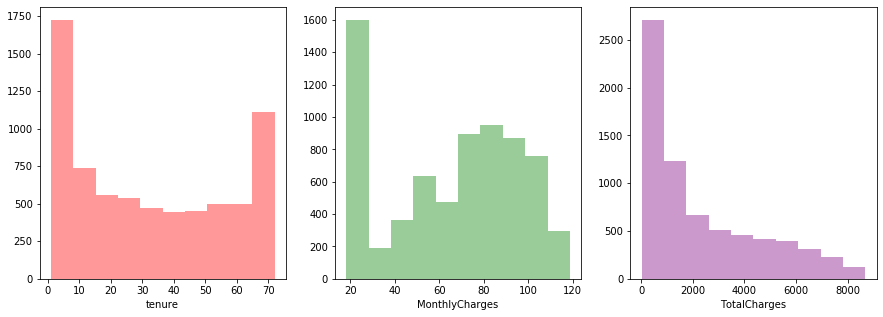

In [22]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

sns.distplot(data["tenure"],bins=10,kde=False,color="red",ax=ax[0])
sns.distplot(data["TotalCharges"],bins=10,kde=False,color="purple",ax=ax[2])
sns.distplot(data["MonthlyCharges"],bins=10,kde=False,color="green",ax=ax[1])

#### Correlation between churn and numerical variables

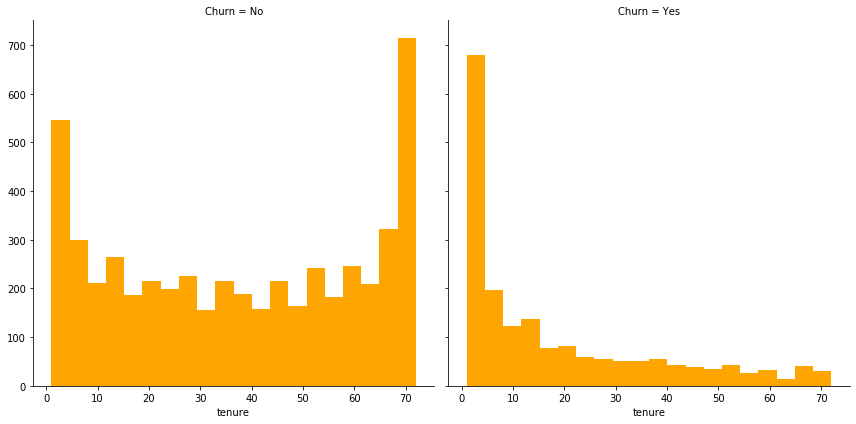

In [23]:
NumHistTenure = sns.FacetGrid(data,col="Churn",height=6,aspect=1)
NumHistTenure = NumHistTenure.map(plt.hist, "tenure",bins=20,color="orange")

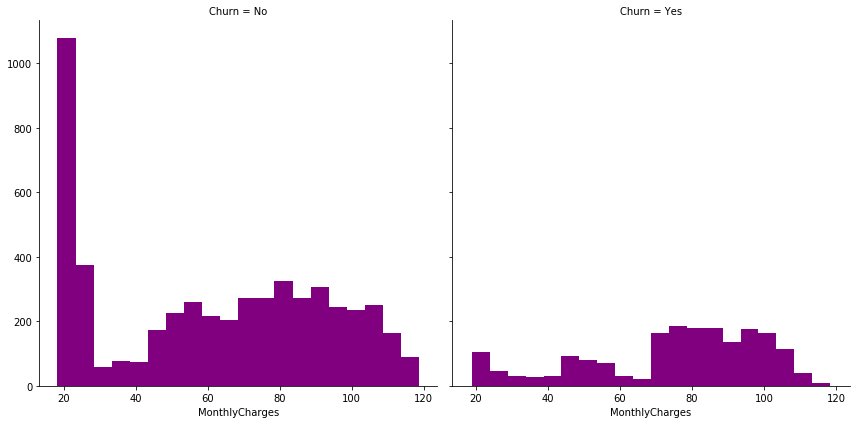

In [24]:
NumHistMC = sns.FacetGrid(data,col="Churn",height=6,aspect=1)
NumHistMC = NumHistMC.map(plt.hist, "MonthlyCharges",bins=20,color="purple")

#### Instantiating a scalar and scaling the data.

In [0]:
scaler = StandardScaler()
data_continuous = scaler.fit_transform(data[data_cont])

#### Instantiating an encoder and encoding the data.

In [0]:
for cols in data_cat:
    data.loc[:,cols] = LabelEncoder().fit_transform(data.loc[:,cols])

onehotencoder = OneHotEncoder(sparse=False)
data_categorical = onehotencoder.fit_transform(data[data_cat])

#### Concatenate Processed Continuous And Categorical Columns Back Together

In [0]:
features = np.concatenate([data_continuous, data_categorical], axis=1)

target = data.iloc[:,20:].values
target = LabelEncoder().fit_transform(target)

#### Splitting data to test and train

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

### Building a sequential model

In [29]:
classifier = Sequential()
classifier.add(Dense(units=6,kernel_initializer="uniform",activation="relu",input_shape=(46,)))
classifier.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
classifier.add(Dense(units=6,kernel_initializer="uniform",activation="relu"))
classifier.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
classifier.add(Dense(units=6,kernel_initializer="uniform",activation="relu"))
classifier.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### Training the classifier

In [30]:
classifier.fit(X_train, y_train, batch_size = 150, nb_epoch = 150)




Epoch 1/150





5625/5625 [==============================] - 1s 220us/step - loss: 0.6533 - acc: 0.7157
Epoch 2/150
5625/5625 [==============================] - 0s 16us/step - loss: 0.5860 - acc: 0.7595
Epoch 3/150
5625/5625 [==============================] - 0s 16us/step - loss: 0.5482 - acc: 0.7628
Epoch 4/150
5625/5625 [==============================] - 0s 16us/step - loss: 0.5203 - acc: 0.7694
Epoch 5/150
5625/5625 [==============================] - 0s 21us/step - loss: 0.5030 - acc: 0.7776
Epoch 6/150
5625/5625 [==============================] - 0s 16us/step - loss: 0.4885 - acc: 0.7861
Epoch 7/150
5625/5625 [==============================] - 0s 16us/step - loss: 0.4716 - acc: 0.7876
Epoch 8/150
5625/5625 [==============================] - 0s 17us/step - loss: 0.4618 - acc: 0.7936
Epoch 9/150
5625/5625 [==============================] - 0s 16us/step - loss: 0.4575 - acc: 0.7890
Epoch 10/150
5625/5625 [==============================] - 0s 16us/step - loss: 0.4419 - acc: 0.7980


#### Prediciting churn

In [0]:
y_pred = classifier.predict_proba(pd.DataFrame(features[0:1]))
#y_pred = (y_pred > 0.5)

In [0]:
#pd.DataFrame(features[0:1]).to_csv('/content/drive/My Drive/content/drive.rec1.csv')
print(y_pred)

[[0.59641534]]


In [0]:
from keras.models import load_model

classifier.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')

#### Classification Report

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1038
           1       0.65      0.50      0.56       369

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



#### Genreating a confusion matrix to evaluate the results

Text(91.68, 0.5, 'predicted label')

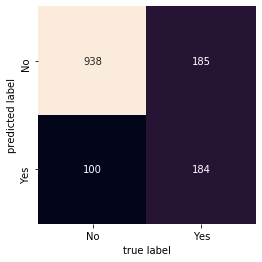

In [0]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T,square=True, annot=True, fmt='d', cbar=False,xticklabels=['No','Yes'],yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')